In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from pydantic.dataclasses import dataclass
from pydantic import Field
from sympy import integrate, lambdify, oo, symbols, Piecewise
from sympy.core.symbol import Symbol

from binaryStatistics.base_distribution import BaseDistribution

In [28]:
@dataclass
class Uniform(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
    
    def distribution(self, x, a=None, b=None):
        if a and b:
            self.norm = 1 / (b - a)
        else:
            self.norm = 1
            
        if isinstance(x, Symbol):
            return Piecewise(
                (0, x < a),
                (0, x > b),
                (1 * self.norm, True)
            )
        if isinstance(x, int | float):
            return 1 * self.norm if a <= x <= b else 0.0
        if isinstance(x, np.ndarray):
            return np.piecewise(x, [(x < a), (t <= b) * (t>=a)], [0, 1 * self.norm])

In [29]:
uniform = Uniform(
    dist_parameters={
        "a": 0,
        "b": 22,
    }
)

In [30]:
_=plt.hist(uniform.random_sample(-1,1,100000), density=True)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [5]:
uniform.display_cdf()

-Min(0, x) + Min(22, x)

In [6]:
uniform.display_pdf()

Piecewise((0, (x > 22) | (x < 0)), (1, True))

In [7]:
uniform.pdf(np.linspace(-1,0))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
uniform.cdf(np.linspace(-22,22))

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [16]:
x = np.linspace(-1,2,10)
np.piecewise(x, [x < 0, x >= 1, x >= 1], [0, 1, 0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

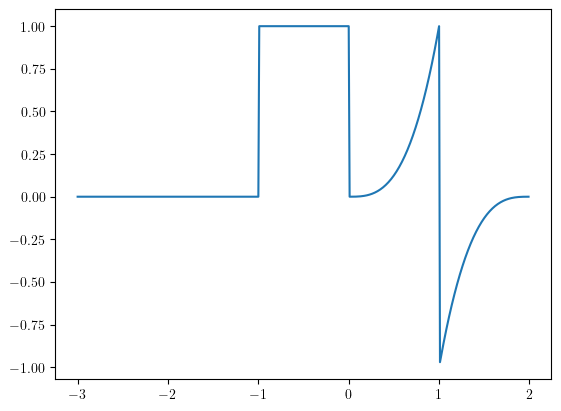

In [24]:
t = np.arange(-3,2,.01)
f1 = lambda t: 0
f2 = lambda t: 1
f3 = lambda t: (t)**3
f4 = lambda t: -(2-t)**3
fx = np.piecewise(t, [(t< -1), (t <= 0) * (t>=-1), (t>0) * (t<1),(t>=1) * (t<=2)], [f1,f2,f3,f4])
plt.plot(t,fx)